# Pandas应用在股票市场

In [7]:
import pandas as pd
import yfinance as yf

# 从Yahoo Finance获取股票数据
stock_data = yf.download('AAPL', start='2015-01-01', end='2022-01-01')

# 计算每日涨跌幅度
stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()

# 计算移动平均
stock_data['MA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

# 打印后几行数据
print(stock_data.tail())

# 保存数据到CSV文件
stock_data.to_csv('datasets/AAPL.csv')


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-27  177.089996  180.419998  177.070007  180.330002  178.065659   
2021-12-28  180.160004  181.330002  178.529999  179.289993  177.038696   
2021-12-29  179.330002  180.630005  178.139999  179.380005  177.127594   
2021-12-30  179.470001  180.570007  178.089996  178.199997  175.962418   
2021-12-31  178.089996  179.229996  177.259995  177.570007  175.340317   

              Volume  Daily_Return       MA_20  
Date                                            
2021-12-27  74919600      0.022975  169.309991  
2021-12-28  79144300     -0.005767  170.250530  
2021-12-29  62348900      0.000502  170.945691  
2021-12-30  59773000     -0.006578  171.608759  
2021-12-31  64062300     -0.003535  172.290591  


<Axes: xlabel='Date'>

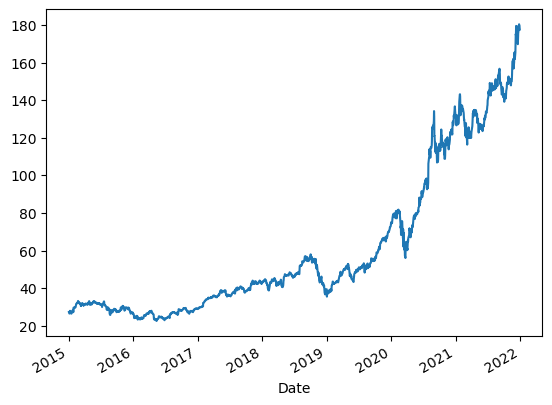

In [11]:
stock_data['Close'].plot()


In [8]:
# 将日期列转换为日期时间类型
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# 计算每只股票的日收益率
stock_data['Daily_Return'] = stock_data.groupby('Stock')['Close'].pct_change()

# 计算每只股票的平均收益率和波动率
stock_summary = stock_data.groupby('Stock')['Daily_Return'].agg(['mean', 'std'])

# 可视化每只股票的平均收益率和波动率
plt.figure(figsize=(10, 6))
plt.scatter(stock_summary['std'], stock_summary['mean'], alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.title('Stock Mean Return vs. Volatility')
for i, txt in enumerate(stock_summary.index):
    plt.annotate(txt, (stock_summary['std'][i], stock_summary['mean'][i]), xytext=(5, -5), textcoords='offset points')
plt.grid(True)
plt.show()


KeyError: 'Date'